Uber Stock Data Summary:
                                Date        Open        High         Low  \
count                            725  725.000000  725.000000  725.000000   
mean   2020-10-16 06:05:27.724137728   40.166447   40.961435   39.261123   
min              2019-05-10 00:00:00   15.960000   17.799999   13.710000   
25%              2020-01-29 00:00:00   32.730000   33.419998   31.983000   
50%              2020-10-15 00:00:00   39.000000   39.959999   38.009998   
75%              2021-07-07 00:00:00   46.700001   47.520000   45.860001   
max              2022-03-24 00:00:00   63.250000   64.050003   60.799999   
std                              NaN    9.198940    9.259164    9.075919   

            Close   Adj Close        Volume  
count  725.000000  725.000000  7.250000e+02  
mean    40.107255   40.107255  2.472855e+07  
min     14.820000   14.820000  3.380000e+06  
25%     32.799999   32.799999  1.423060e+07  
50%     38.810001   38.810001  2.079540e+07  
75%     46.419

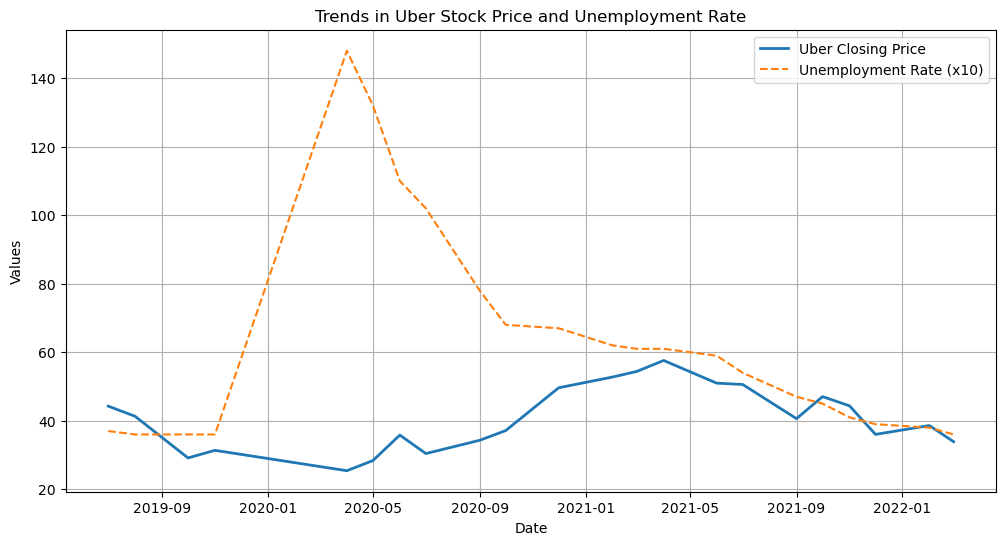

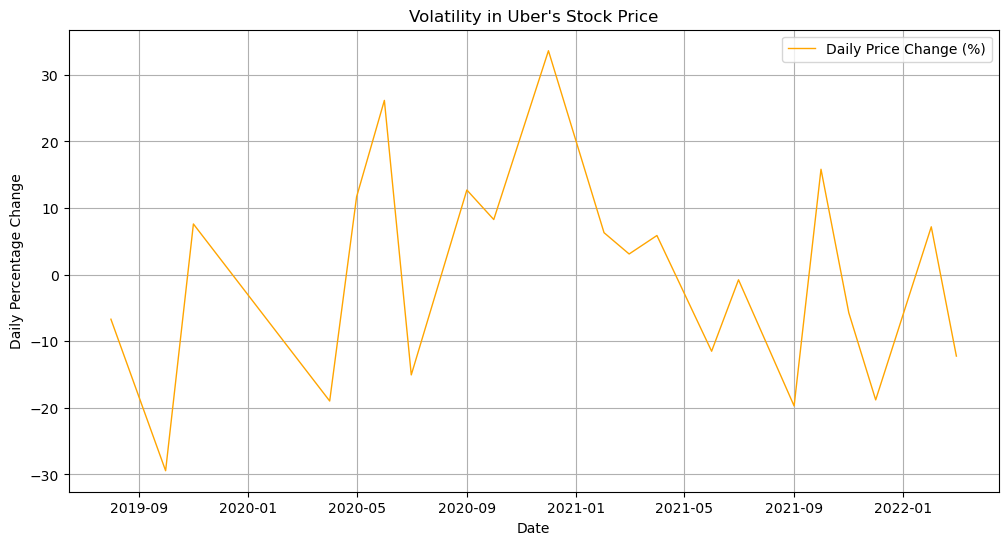

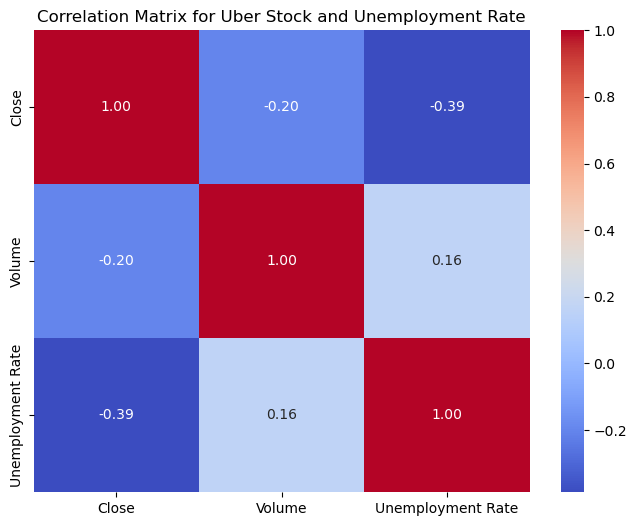

/Users/jissielin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jissielin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jissielin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jissielin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index begin

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   22
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -66.041
Date:                Wed, 18 Dec 2024   AIC                            144.082
Time:                        20:52:13   BIC                            150.349
Sample:                             0   HQIC                           145.442
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0173      0.428     -0.041      0.968      -0.855       0.821
ar.L2          0.2774      0.394      0.705      0.481      -0.494       1.049
ar.L3          0.0641      0.385      0.167      0.8

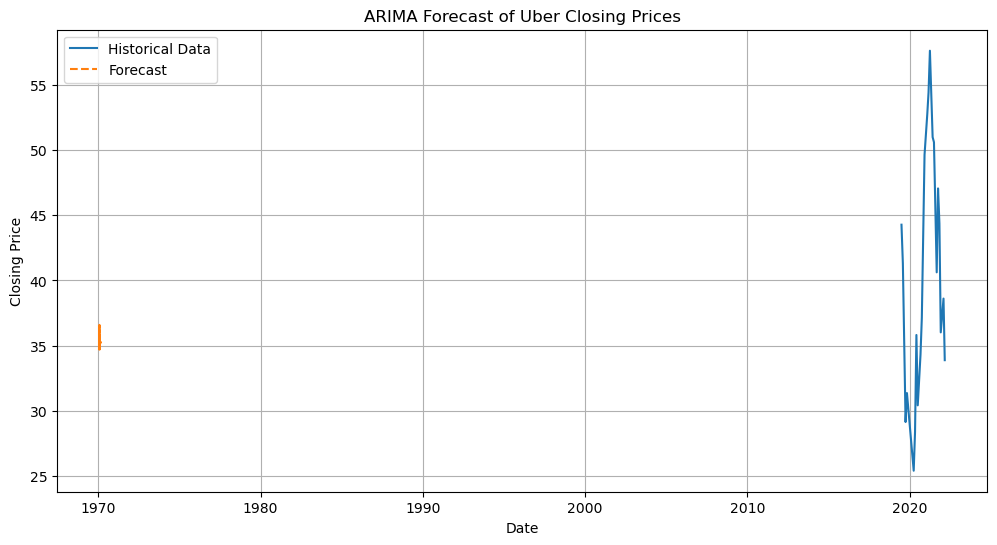

Linear Regression Coefficients:
Slope: -1.12, Intercept: 47.71


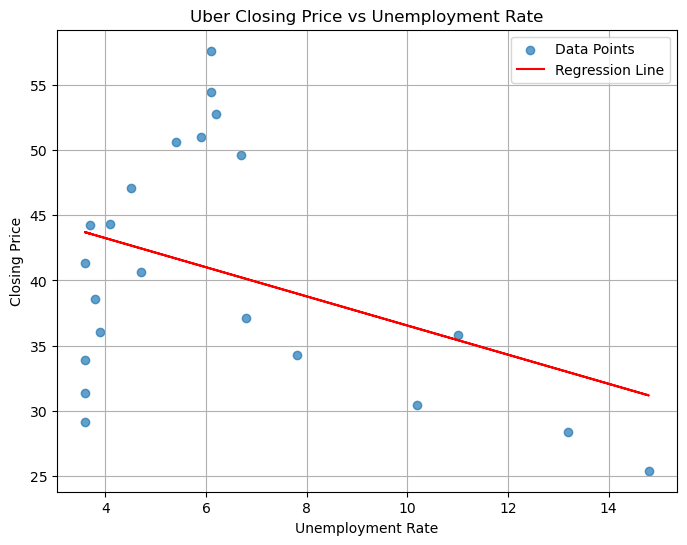

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load and preprocess data
# Load Uber stock data
uber_data = pd.read_csv('UBER.csv')
uber_data['Date'] = pd.to_datetime(uber_data['Date'])
uber_data = uber_data.sort_values(by='Date')

# Load unemployment data
unemployment_new_data = pd.read_csv('BLS Data Series.csv')
columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
unemployment_new_data.columns = columns

# Remove invalid rows 
unemployment_new_data = unemployment_new_data[pd.to_numeric(unemployment_new_data['Year'], errors='coerce').notnull()]
unemployment_new_data['Year'] = unemployment_new_data['Year'].astype(int)

# Reshape the data
unemployment_long = unemployment_new_data.melt(id_vars=['Year'], var_name='Month', value_name='Unemployment Rate')

# Map months to numerical values
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
unemployment_long['Month'] = unemployment_long['Month'].map(month_map)

# Convert 'Unemployment Rate' to numeric and handle errors
unemployment_long['Unemployment Rate'] = pd.to_numeric(unemployment_long['Unemployment Rate'], errors='coerce')

# Remove rows with missing or invalid data
unemployment_long = unemployment_long.dropna(subset=['Unemployment Rate'])

# Create a 'Date' column
unemployment_long['Date'] = pd.to_datetime(unemployment_long[['Year', 'Month']].assign(Day=1))

# Filter data to match Uber stock date range
unemployment_filtered = unemployment_long[unemployment_long['Date'] >= uber_data['Date'].min()]

# Merge the two datasets
merged_data = pd.merge(uber_data, unemployment_filtered[['Date', 'Unemployment Rate']], on='Date', how='inner')

# Step 2: Perform exploratory data analysis (EDA)
print("Uber Stock Data Summary:")
print(uber_data.describe())
print("Unemployment Data Summary:")
print(unemployment_filtered.describe())

# Step 3: Visualize trends
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'], label='Uber Closing Price', linewidth=2)
plt.plot(merged_data['Date'], merged_data['Unemployment Rate'] * 10, label='Unemployment Rate (x10)', linestyle='--')
plt.title("Trends in Uber Stock Price and Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

# Step 4: Volatility Analysis
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'].pct_change() * 100, label='Daily Price Change (%)', linewidth=1, color='orange')
plt.title("Volatility in Uber's Stock Price")
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change")
plt.legend()
plt.grid()
plt.show()

# Step 5: Correlation Study
correlation_matrix = merged_data[['Close', 'Volume', 'Unemployment Rate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix for Uber Stock and Unemployment Rate")
plt.show()

# Step 6: Predictive Modeling
# ARIMA model for stock price forecasting
closing_prices = merged_data[['Date', 'Close']].set_index('Date')
model = ARIMA(closing_prices, order=(5, 1, 0))  # Example order (p, d, q)
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=30)  # Predict next 30 days
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Historical Data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title("ARIMA Forecast of Uber Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()

# Linear Regression for unemployment rate vs. stock price
x = merged_data['Unemployment Rate'].values.reshape(-1, 1)
y = merged_data['Close'].values
reg_model = LinearRegression()
reg_model.fit(x, y)
print("Linear Regression Coefficients:")
print(f"Slope: {reg_model.coef_[0]:.2f}, Intercept: {reg_model.intercept_:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Unemployment Rate'], merged_data['Close'], alpha=0.7, label='Data Points')
plt.plot(merged_data['Unemployment Rate'], reg_model.predict(x), color='red', label='Regression Line')
plt.title("Uber Closing Price vs Unemployment Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()
